In [22]:
import os, sys
sys.path.insert(1, os.path.abspath('..'))

from eustats import *

In [23]:
# Create a dictionary with EU NUTS2 regions
regions = {}
for item in countries.values():
    regions.update(codes[item])

In [24]:
# Get Regional GDP
def get_gdp_region():
    params = {'unit': 'MIO_EUR', 'geo': list(regions.keys()), 'time': 2020}
    df = client.get_dataset('nama_10r_2gdp', params).to_dataframe()
    df.dropna(inplace = True)
    df['region_name'] = df['geo'].apply(lambda x: regions[x])
    df.set_index('region_name', inplace=True) 
    df.rename(columns = {'values': 'GDP'}, inplace = True)
    df['GDP'] = df['GDP'] / 1000
    df = df[['GDP']]

    return df

In [25]:
# Get regional GDP per capita
def get_gdp_capita_region():
    params = {'unit': 'EUR_HAB', 'time': 2020,
              'geo': list(regions.keys())}
    df = client.get_dataset('nama_10r_2gdp', params).to_dataframe()
    df.dropna(inplace = True)
    df['region_name'] = df['geo'].apply(lambda x: regions[x])
    df.set_index('region_name', inplace=True) 
    df.rename(columns = {'values': 'GDP per Capita'}, inplace = True)
    df = df[['GDP per Capita']]
    
    return df


In [26]:
# Get regional Unemployment
def get_unemployment_region():
    params = {'sex': 'T', 'geo': list(regions.keys()), 'time': 2021,
              'age': 'Y15-74', 'isced11': 'TOTAL'} 
    df = client.get_dataset('lfst_r_lfu3rt', params).to_dataframe()
    df.dropna(inplace = True)
    df['region_name'] = df['geo'].apply(lambda x: regions[x])
    df.rename(columns = {'values': 'Unemployment %'}, inplace = True)
    df.set_index('region_name', inplace=True) 
    df = df[['Unemployment %']]
    
    return df


In [27]:
# Get life expectancy
def get_life_expectancy():
    params = {'sex': 'T', 'geo': list(regions.keys()), 'time': 2020}
    df = client.get_dataset('tgs00101', params).to_dataframe()
    df.dropna(inplace = True)
    df['region_name'] = df['geo'].apply(lambda x: regions[x])
    df.rename(columns = {'values': 'Life Expectancy'}, inplace = True)
    df.set_index('region_name', inplace=True) 
    df = df[['Life Expectancy']]
    
    return df

In [28]:
# Tertiary Educational attainment

def get_tertiary_education():
    params = {'sex': 'T', 'geo': list(regions.keys()), 'time': 2020}
    df = client.get_dataset('tgs00109', params).to_dataframe()
    df.dropna(inplace = True)
    df['region_name'] = df['geo'].apply(lambda x: regions[x])
    df.rename(columns = {'values': 'Tertiary Educational Attainment %'}, inplace = True)
    df.set_index('region_name', inplace=True) 
    df = df[['Tertiary Educational Attainment %']]
    
    return df

In [29]:
# Get Poverty Risk

def get_poverty_risk():
    params = {'geo': list(regions.keys()), 'time': 2019}
    df = client.get_dataset('ilc_peps11', params).to_dataframe()
    df.dropna(inplace = True)
    df['region_name'] = df['geo'].apply(lambda x: regions[x])
    df.rename(columns = {'values': 'People at Risk of Poverty %'}, inplace = True)
    df.set_index('region_name', inplace=True) 
    df = df[['People at Risk of Poverty %']]
    
    return df


In [30]:
# Get regional availability of doctors

def get_doctors():
    params = {'geo': list(regions.keys()), 'time': 2019,'unit': 'P_HTHAB',
              'isco08': 'OC221' }
    df = client.get_dataset('hlth_rs_prsrg', params).to_dataframe()
    df.dropna(inplace = True)
    df['region_name'] = df['geo'].apply(lambda x: regions[x])
    df.rename(columns = {'values': 'Doctors per 100000'}, inplace = True)
    df.set_index('region_name', inplace=True) 
    df = df[['Doctors per 100000']]
    
    return df


In [31]:
# Deaths in road accidents

def get_fatal_road_accidents():
    params = {'victim': 'KIL', 'geo': list(regions.keys()), 'time': 2020,
              'unit': 'P_MHAB'}
    df = client.get_dataset('tran_r_acci', params).to_dataframe()
    df.dropna(inplace = True)
    df['region_name'] = df['geo'].apply(lambda x: regions[x])
    df.rename(columns = {'values': 'Fatal Road Accidents per Million'}, inplace = True)
    df.set_index('region_name', inplace=True) 
    df = df[['Fatal Road Accidents per Million']]
    
    return df


In [32]:
# Get Regular Internet Users

def get_regular_internet_users():
    params = {'indic_is': 'I_IDAY', 'geo': list(regions.keys()), 'time': 2021,
              'unit': 'PC_IND'}
    df = client.get_dataset('isoc_r_iuse_i', params).to_dataframe()
    df.dropna(inplace = True)
    df['region_name'] = df['geo'].apply(lambda x: regions[x])
    df.rename(columns = {'values': 'Regular Internet Users %'}, inplace = True)
    df.set_index('region_name', inplace=True) 
    df = df[['Regular Internet Users %']]
    
    return df


In [33]:
df = get_gdp_region()
df = df.join(get_gdp_capita_region())
df = df.join(get_unemployment_region())
df = df.join(get_life_expectancy())
df = df.join(get_tertiary_education())
df = df.join(get_poverty_risk())
df = df.join(get_doctors())
df = df.join(get_fatal_road_accidents())
df = df.join(get_regular_internet_users())
df.dropna(thresh = 2, inplace = True)


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 242 entries, Abruzzo to Южен централен (Yuzhen tsentralen)
Data columns (total 9 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   GDP                                242 non-null    float64
 1   GDP per Capita                     242 non-null    float64
 2   Unemployment %                     238 non-null    float64
 3   Life Expectancy                    238 non-null    float64
 4   Tertiary Educational Attainment %  238 non-null    float64
 5   People at Risk of Poverty %        183 non-null    float64
 6   Doctors per 100000                 173 non-null    float64
 7   Fatal Road Accidents per Million   239 non-null    float64
 8   Regular Internet Users %           169 non-null    float64
dtypes: float64(9)
memory usage: 18.9+ KB


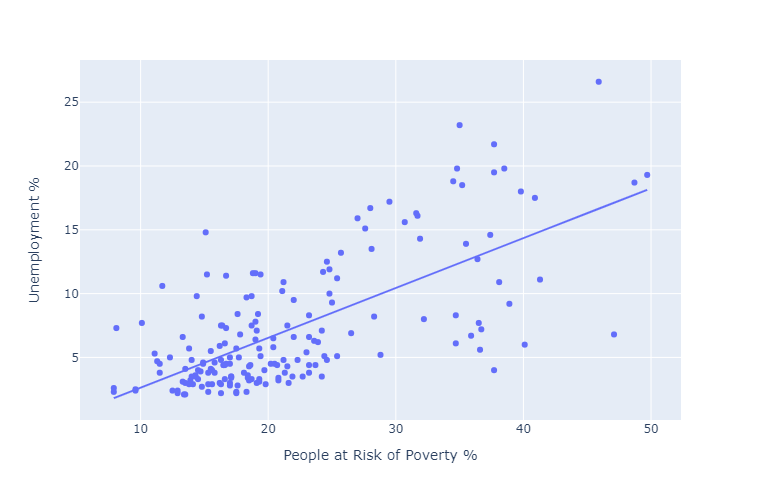

In [35]:
df.plot(kind = 'scatter', backend = 'plotly',
        x = 'People at Risk of Poverty %', y = 'Unemployment %',
        trendline = 'ols',
        height = 500)

In [36]:
df.corr(method = 'pearson')

,GDP,GDP per Capita,Unemployment %,Life Expectancy,Tertiary Educational Attainment %,People at Risk of Poverty %,Doctors per 100000,Fatal Road Accidents per Million,Regular Internet Users %
GDP,1.000000,0.480599,-0.085736,0.284876,0.313328,-0.239806,0.079288,-0.380467,0.190661
GDP per Capita,0.480599,1.000000,-0.261789,0.531489,0.561024,-0.454076,0.190772,-0.546357,0.643841
Unemployment %,-0.085736,-0.261789,1.000000,0.264385,-0.090360,0.681183,0.213945,0.000372,-0.154073
Life Expectancy,0.284876,0.531489,0.264385,1.000000,0.331525,-0.165397,0.199542,-0.479153,0.451299
Tertiary Educational Attainment %,0.313328,0.561024,-0.090360,0.331525,1.000000,-0.380287,0.306468,-0.439905,0.646353
People at Risk of Poverty %,-0.239806,-0.454076,0.681183,-0.165397,-0.380287,1.000000,0.020383,0.285668,-0.568167
Doctors per 100000,0.079288,0.190772,0.213945,0.199542,0.306468,0.020383,1.000000,-0.314971,0.212098
Fatal Road Accidents per Million,-0.380467,-0.546357,0.000372,-0.479153,-0.439905,0.285668,-0.314971,1.000000,-0.581966
Regular Internet Users %,0.190661,0.643841,-0.154073,0.451299,0.646353,-0.568167,0.212098,-0.581966,1.000000
